In [1]:
# imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# local
import wrangle_zillow as w

# Exercises
Sourcing the Zillow database as the data source



In [2]:
df = w.wrangle_zillow()
df

,yearbuilt,bathroomcnt,bedroomcnt,roomcnt,garagecarcnt,calculatedfinishedsquarefeet,latitude,longitude,county,regionidzip,...,airconditioningtypeid,airconditioningdesc,heatingorsystemtypeid,heatingorsystemdesc,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
0,1998.0,3.5,4.0,0.0,2.0,3100.0,33634931.0,-117869207.0,Orange,96978,...,5.0,None,24.0,Yes,1023282.0,485713.0,537569.0,11013.72,0.025595,2017-01-01
1,1967.0,1.0,2.0,5.0,1.0,1465.0,34449266.0,-119281531.0,Ventura,97099,...,5.0,None,24.0,Yes,464000.0,88000.0,376000.0,5672.48,0.055619,2017-01-01
2,1962.0,2.0,3.0,6.0,2.0,1243.0,33886168.0,-117823170.0,Orange,97078,...,5.0,None,24.0,Yes,564778.0,85289.0,479489.0,6488.30,0.005383,2017-01-01
3,1970.0,3.0,4.0,0.0,0.0,2376.0,34245180.0,-118240722.0,LA,96330,...,5.0,None,2.0,Central,145143.0,108918.0,36225.0,1777.51,-0.103410,2017-01-01
4,1964.0,3.0,3.0,0.0,0.0,1312.0,34185120.0,-118414640.0,LA,96451,...,1.0,Central,2.0,Central,119407.0,73681.0,45726.0,1533.89,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,1980.0,3.0,3.0,0.0,0.0,1741.0,34202400.0,-118502000.0,LA,96415,...,1.0,Central,2.0,Central,379000.0,265000.0,114000.0,4685.34,-0.002245,2017-09-20
77609,1940.0,2.0,2.0,0.0,0.0,1286.0,34245368.0,-118282383.0,LA,96284,...,5.0,None,2.0,Central,354621.0,70917.0,283704.0,4478.43,0.020615,2017-09-20
77610,1964.0,2.0,4.0,7.0,2.0,1612.0,34300140.0,-118706327.0,Ventura,97116,...,5.0,None,24.0,Yes,67205.0,50683.0,16522.0,1107.48,0.013209,2017-09-21
77611,1954.0,1.0,3.0,0.0,0.0,1032.0,34040895.0,-118038169.0,LA,96480,...,1.0,Central,2.0,Central,49546.0,32797.0,16749.0,876.43,0.037129,2017-09-21


In [4]:
train,val,test = w.split_data(df)
train

,yearbuilt,bathroomcnt,bedroomcnt,roomcnt,garagecarcnt,calculatedfinishedsquarefeet,latitude,longitude,county,regionidzip,...,airconditioningtypeid,airconditioningdesc,heatingorsystemtypeid,heatingorsystemdesc,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
58985,1952.0,2.0,3.0,0.0,0.0,1262.0,34126571.0,-117878386.0,LA,96485,...,5.0,None,7.0,Floor/Wall,238881.0,99706.0,139175.0,2975.59,-0.071096,2017-07-20
7542,2005.0,3.0,4.0,0.0,0.0,2744.0,34396842.0,-118480331.0,LA,96352,...,1.0,Central,2.0,Central,525400.0,293300.0,232100.0,6952.31,-0.042940,2017-02-02
27492,1929.0,1.0,2.0,0.0,0.0,1123.0,34021399.0,-118113270.0,LA,96192,...,5.0,None,7.0,Floor/Wall,360751.0,117668.0,243083.0,5586.04,-0.048356,2017-04-18
61874,1954.0,2.0,3.0,0.0,0.0,1515.0,34171103.0,-118443018.0,LA,96410,...,1.0,Central,2.0,Central,689300.0,194400.0,494900.0,8306.85,0.001259,2017-07-28
72943,1955.0,2.0,3.0,0.0,0.0,1260.0,34695898.0,-118125690.0,LA,97318,...,5.0,None,2.0,Central,124473.0,102177.0,22296.0,2174.05,-0.055322,2017-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47516,1936.0,1.0,2.0,0.0,0.0,888.0,34256546.0,-118292578.0,LA,96284,...,5.0,None,7.0,Floor/Wall,210082.0,73210.0,136872.0,2622.43,-0.112953,2017-06-16
41251,1992.0,3.0,3.0,0.0,0.0,3231.0,34614390.0,-118183779.0,LA,97329,...,1.0,Central,2.0,Central,481602.0,361473.0,120129.0,7004.79,-0.063337,2017-05-31
58831,1923.0,1.0,2.0,0.0,0.0,1090.0,33975601.0,-118307247.0,LA,96028,...,5.0,None,7.0,Floor/Wall,310658.0,78803.0,231855.0,3872.12,0.061629,2017-07-20
42069,2005.0,2.0,3.0,0.0,1.0,2844.0,33600351.0,-117872746.0,Orange,96957,...,5.0,None,24.0,Yes,2329953.0,404443.0,1925510.0,24797.54,0.154577,2017-06-01


In [5]:
trains,vals,tests = w.std_zillow(train,val,test,train.select_dtypes(exclude=['object', 'category']).columns)

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?



### 2. Answer those questions through a mix of statistical tests and visualizations.

In [6]:
def pear(train, x, y, alt_hyp='two-sided'):
    '''Spearman's R test with a print'''
    r,p = stats.spearmanr(train[x], train[y], alternative=alt_hyp)
    print(f"Spearman's R: {x} and {y}\n", f'r = {r}, p = {p}')

def nova(s1,s2,s3):
    '''ANOVA test for 3 samples'''
    stat,p = stats.kruskal(s1,s2,s3)
    print("Kruskal-Wallis H-Test:\n", f'stat = {stat}, p = {p}')

Kruskal-Wallis H-Test:
 stat = 17.552163268997916, p = 0.00015438182600873316


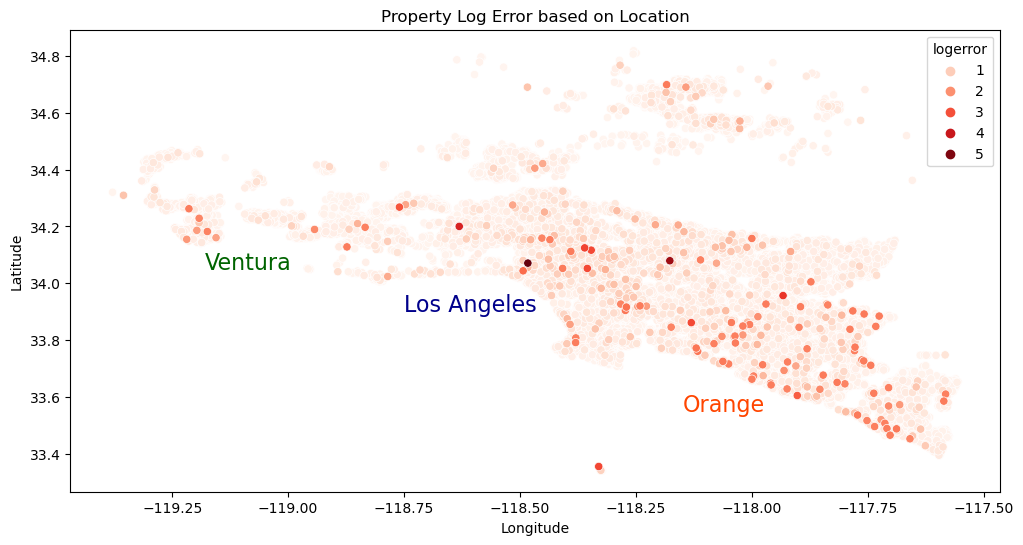

In [7]:
# is logerror sig diff for counties?
nova(train[train.county=='LA'].logerror,train[train.county=='Orange'].logerror,train[train.county=='Ventura'].logerror)
# sns.scatterplot(data=train,y='county',x='logerror')
# plt.show()
p = train.copy()
p = p.assign(lat=p.latitude/1000000)
p = p.assign(long=p.longitude/1000000)
p.logerror = abs(p.logerror)
# p = p.sort_values('logerror')
# make the size
plt.figure(figsize=[12,6])
# plots
sns.scatterplot(data=p.sort_values('logerror'),y='lat',x='long',hue='logerror',palette='Reds')
# plot county
plt.text(y=34.05,x=-119.18,s='Ventura',fontsize=16,color='darkgreen')
plt.text(y=33.9,x=-118.75,s='Los Angeles',fontsize=16,color='darkblue')
plt.text(y=33.55,x=-118.15,s='Orange',fontsize=16,color='orangered')
# give it a name
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Property Log Error based on Location')
plt.show()
# is diff

Spearman's R: taxvaluedollarcnt and logerror
 r = 0.02219581449701555, p = 4.0472811462184974e-06


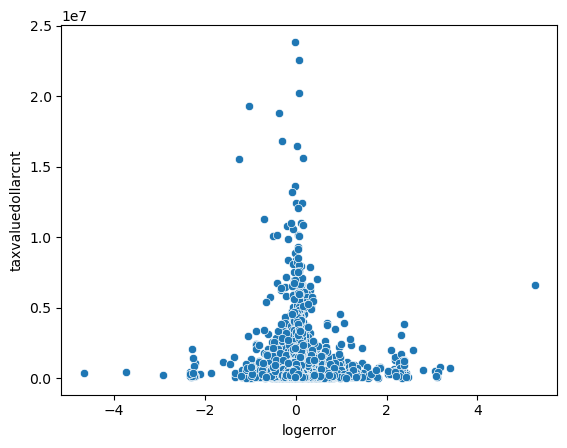

In [8]:
# is logerror corr with tax value?
pear(train,'taxvaluedollarcnt','logerror')
sns.scatterplot(data=train,y='taxvaluedollarcnt',x='logerror')
plt.show()
# is corr

Spearman's R: yearbuilt and logerror
 r = 0.03719314725438276, p = 1.1199181143798595e-14


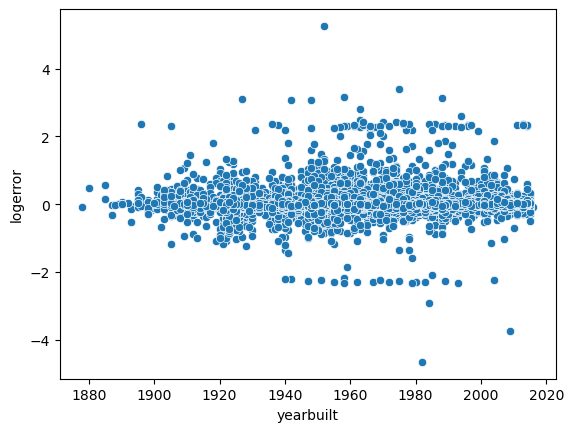

In [9]:
# is year and logerror corr?
pear(train,'yearbuilt','logerror')
sns.scatterplot(data=train,y='logerror',x='yearbuilt')
plt.show()
# is corr

Spearman's R: calculatedfinishedsquarefeet and logerror
 r = 0.08062494035655923, p = 4.259652743479975e-63


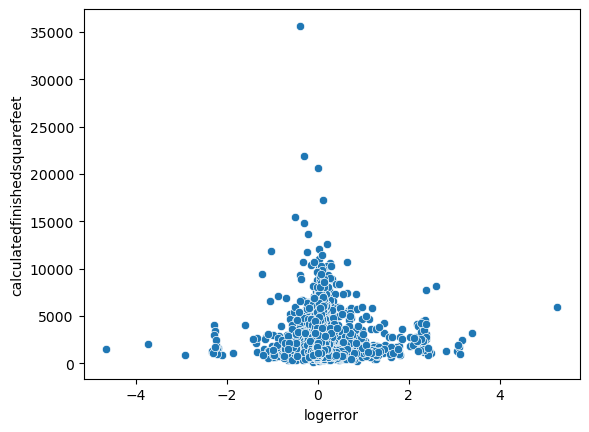

In [10]:
# is logerror corr with calculatedfinishedsquarefeet?
pear(train,'calculatedfinishedsquarefeet','logerror')
sns.scatterplot(data=train,x='logerror',y='calculatedfinishedsquarefeet')
plt.show()
# is corr

Kruskal-Wallis H-Test:
 stat = 8.995561549491217, p = 0.029349956395976116


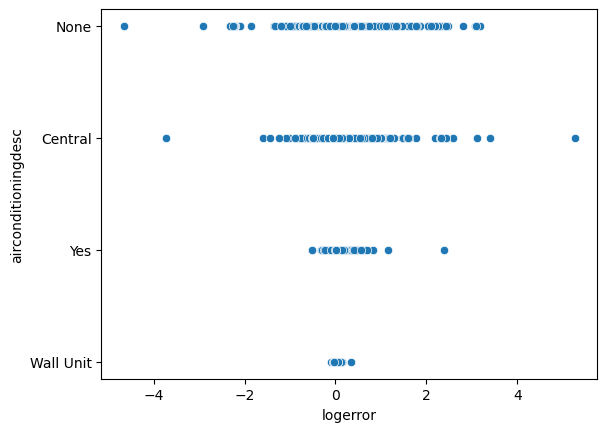

In [11]:
# is logerror sig diff for airconditioningdesc?
stat,p = stats.kruskal(train[train.airconditioningdesc=='None'].logerror,train[train.airconditioningdesc=='Central'].logerror,train[train.airconditioningdesc=='Yes'].logerror,train[train.airconditioningdesc=='Wall Unit'].logerror)
print("Kruskal-Wallis H-Test:\n", f'stat = {stat}, p = {p}')
sns.scatterplot(data=train,y='airconditioningdesc',x='logerror')
plt.show()
# is diff barely

#### Bonus:

#### Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [12]:
zip_log = train.groupby(['regionidzip']).agg(logerror_mean=('logerror', 'mean'))
zip_log

,logerror_mean
regionidzip,
95982,0.051950
95983,-0.004799
95984,-0.085889
95985,0.000411
95986,0.021438
...,...
97329,0.015998
97330,0.014265
97331,0.031296


In [13]:
train.logerror.mean()

0.01674798889479387

In [14]:
sts = []
for zip in train.regionidzip.value_counts().index:
    lem = train[train.regionidzip==zip].logerror.mean()
    t,p = stats.ttest_1samp(train[train.regionidzip==zip].logerror,train.logerror.mean())
    output = {
        'zipcode':zip,
        'zip_count':train[train.regionidzip==zip].shape[0],
        'le_mean':lem,
        't_test_t':t,
        't_test_p':p
    }
    sts.append(output)
sts = pd.DataFrame(sts)
sts

c:\tools\Anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
c:\tools\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\tools\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,zipcode,zip_count,le_mean,t_test_t,t_test_p
0,97319,493,0.019788,0.443771,0.657403
1,96987,467,0.009530,-0.812533,0.416901
2,97318,419,0.003515,-1.972316,0.049232
3,97118,383,0.008649,-0.858229,0.391304
4,96993,370,0.006340,-4.292711,0.000023
...,...,...,...,...,...
380,95988,4,0.016011,-0.012956,0.990476
381,97108,3,-0.103107,-1.081965,0.392370
382,97111,1,0.273048,NaN,NaN
383,96467,1,-0.015992,NaN,NaN
